In [1]:
import matplotlib.pyplot as plt

In [4]:
learning_rates_paths = "ex_2/resources/training/learning_rates.txt"
k_paths = "ex_2/resources/training/k_vs_errors.txt"

<ErrorbarContainer object of 3 artists>

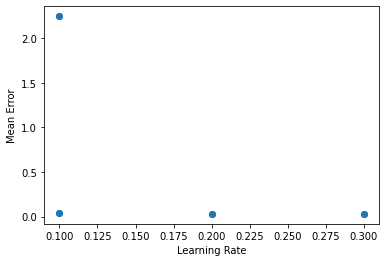

In [5]:
f = open(learning_rates_paths, "r")
lines = f.readlines()
learning_rates = []
mean_errors = []
std_errors =[]
for line in lines:
    lr, mean, std = line.strip().split(",")
    learning_rates.append(float(lr))
    mean_errors.append(float(mean))
    std_errors.append(float(std))
f.close()
plt.scatter(learning_rates, mean_errors)
plt.xlabel("Learning Rate")
plt.ylabel("Mean Error")
plt.errorbar(learning_rates, mean_errors, yerr=std_errors, ecolor = 'grey', elinewidth = 0.5, capsize=1.5, fmt="o")


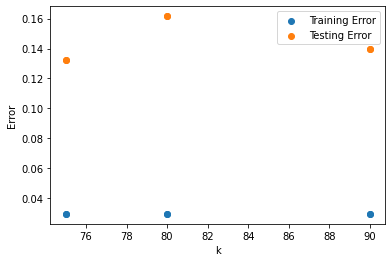

In [7]:
f = open(k_paths, "r")
lines = f.readlines()
training_percentages = []
mean_errors = []
std_errors =[]
mean_rmsd =[]
std_rmsd =[]
for line in lines:
    k, e_mean, e_std, rmsd_mean, rmsd_std  = line.strip().split(",")
    training_percentages.append(((int(k)-1)/int(k))*100)
    mean_errors.append(float(mean))
    std_errors.append(float(std))
    mean_rmsd.append(float(rmsd_mean))
    std_rmsd.append(float(rmsd_std))
f.close()
plt.scatter(training_percentages, mean_errors, label="Training Error")
plt.scatter(training_percentages, mean_rmsd, label="Testing Error")
plt.xlabel("Training set (%)")
plt.ylabel("Error")
plt.errorbar(training_percentages, mean_errors, yerr=std_errors, ecolor = 'grey', elinewidth = 0.5, capsize=1.5, fmt="o")
plt.errorbar(training_percentages, mean_rmsd, yerr=std_rmsd, ecolor = 'grey', elinewidth = 0.5, capsize=1.5, fmt="o")
plt.legend()